# Import open source packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)
tf.__version__

'2.12.0'

# User defined methods

## Get performace metrices

In [114]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def get_metrics(y_test,y_pred):
    return {"accuracy":tf.keras.metrics.binary_accuracy(y_true=y_test, y_pred=tf.squeeze(y_pred)).numpy(),
            "precission" :  precision_score(y_true=y_test,y_pred=tf.round(y_pred)),
            "recall" :  recall_score(y_true=y_test,y_pred=tf.round(y_pred)),
            "F1-Score" :  f1_score(y_true=y_test,y_pred=tf.round(y_pred)),
    }

## Plot decision Boundary

In [3]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

* Binary Classification
* Multi Class Classification
* Multi Label Classification

# Get Data

In [4]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,
                   shuffle=True,
                   noise=0.03,
                   random_state=42)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

# Visulize the Data

In [6]:
X[0:10], y[0:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [7]:
df = pd.DataFrame(X,columns=["X0", "X1"])
df.head()

,X0,X1
0,0.754246,0.231481
1,-0.756159,0.153259
2,-0.815392,0.173282
3,-0.393731,0.692883
4,0.442208,-0.896723


<Axes: xlabel='X0', ylabel='X1'>

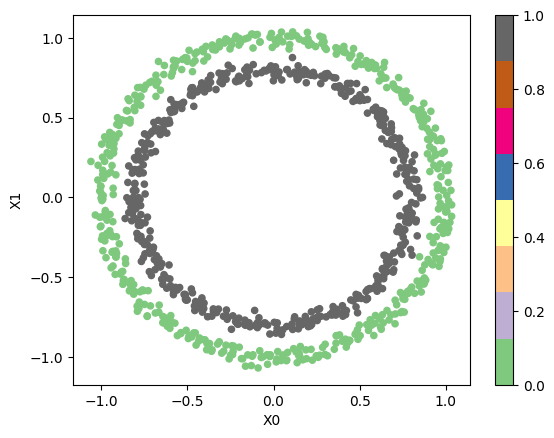

In [8]:
df.plot.scatter(x='X0', y='X1', c =y ,colormap='Accent')

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

# Split the Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

<Axes: xlabel='X0', ylabel='X1'>

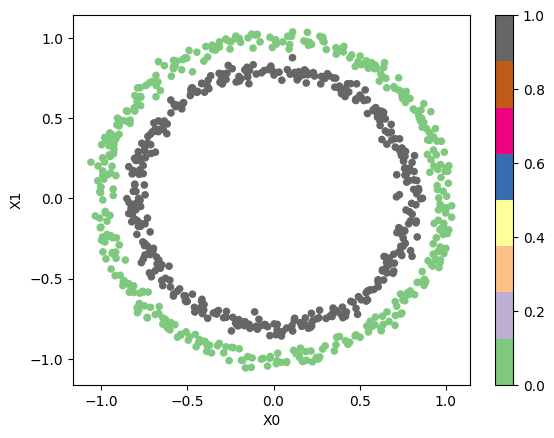

In [11]:
df = pd.DataFrame(X_train,columns=["X0", "X1"])
df.plot.scatter(x='X0', y='X1', c =y_train,colormap='Accent')

<Axes: xlabel='X0', ylabel='X1'>

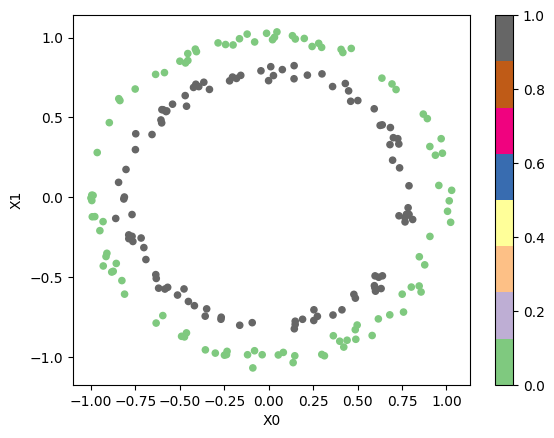

In [12]:
df = pd.DataFrame(X_test,columns=["X0", "X1"])
df.plot.scatter(x='X0', y='X1', c =y_test,colormap='Accent')

# Build, Compile, Fit the Model and Evalaute

## Experiment -1

In [13]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    layers = [
        tf.keras.Input(shape=(2,)),
        tf.keras.layers.Dense(1)

            ],
    name="2D_points_Classifier"

    )
model_1.summary()

Model: "2D_points_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [15]:
histroy_1 = model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 6.2504 - accuracy: 0.4825
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 6.1213 - accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 5.9481 - accuracy: 0.4775
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 5.7870 - accuracy: 0.4775
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 5.1641 - accuracy: 0.4725
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.6777 - accuracy: 0.4462
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 4.4846 - accuracy: 0.4613
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 4.1489 - accuracy: 0.4725
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 3.9327 - accuracy: 0.4837
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 3.7964 - accuracy: 0.4787
Epoch 11/

<Axes: >

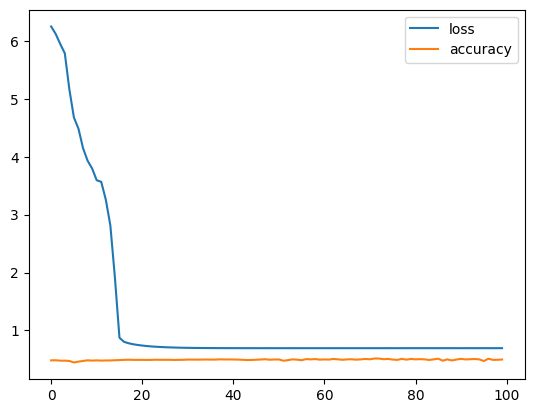

In [16]:
pd.DataFrame(histroy_1.history).plot()

In [17]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936855316162109, 0.5]

In [18]:
y_pred_1 = model_1.predict(X_test)
y_pred_1[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.5015203 ],
       [0.50852203],
       [0.50934845],
       [0.50388443],
       [0.49573046],
       [0.49971715],
       [0.50561124],
       [0.49638087],
       [0.49422458],
       [0.509882  ]], dtype=float32)

7/7 [==============================] - 0s 2ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

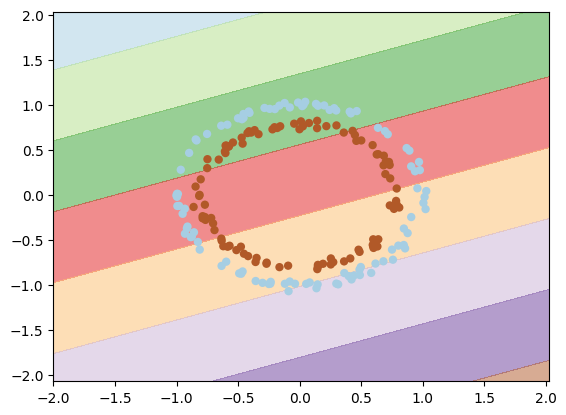

In [19]:
plot_decision_boundary(X_test, y_test, model_1)

In [20]:
acc_1 = get_metrics(y_test,y_pred_1)
acc_1

0.5

## Experiment - 2

Add extra hidden layer

In [21]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    layers = [
        tf.keras.Input(shape=(2,)),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ],
    name = "2D_point_classifier")
model_2.summary()

Model: "2D_point_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [23]:
history_2 = model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7171 - accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4875
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4700
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5163
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4888
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4712
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5125
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4837
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4525
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5013
Epoch 11/

<Axes: >

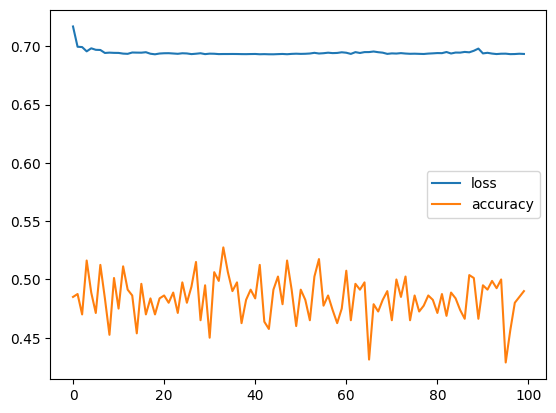

In [24]:
pd.DataFrame(history_2.history).plot()

In [25]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932637095451355, 0.5]

In [26]:
y_pred_2=model_2.predict(X_test)
y_pred_2[:10]

7/7 [==============================] - 0s 1ms/step


array([[0.50719726],
       [0.5033591 ],
       [0.50439316],
       [0.50153685],
       [0.5030653 ],
       [0.5066723 ],
       [0.50758815],
       [0.50470287],
       [0.50377274],
       [0.50748616]], dtype=float32)

7/7 [==============================] - 0s 1ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

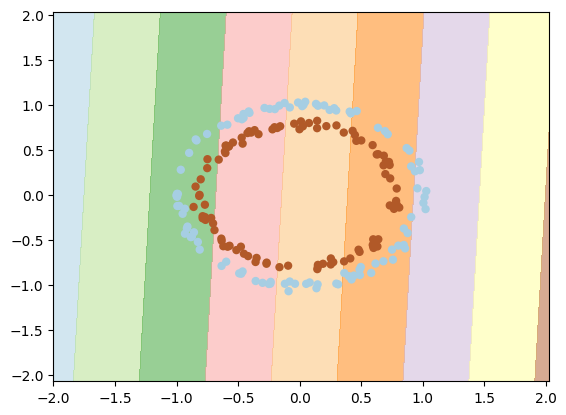

In [27]:
plot_decision_boundary(X_test, y_test, model_2)

In [28]:
acc_2 = get_metrics(y_test,y_pred_2)
acc_2

0.5

## Experiment -3

Adding relu activation to the hidden layer


In [29]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
                        layers=[
                            tf.keras.Input(shape=(2,)),
                            tf.keras.layers.Dense(units=100, activation="relu"),
                            tf.keras.layers.Dense(units=1, activation="sigmoid")
                        ],
                        name="2D_point_classifier",
)
model_3.summary()

Model: "2D_point_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [31]:
history_3 = model_3.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6988 - accuracy: 0.5200
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5537
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6425
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7862
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7663
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8338
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.9463
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.9825
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9825
Epoch 11/25
25/25 [

<Axes: >

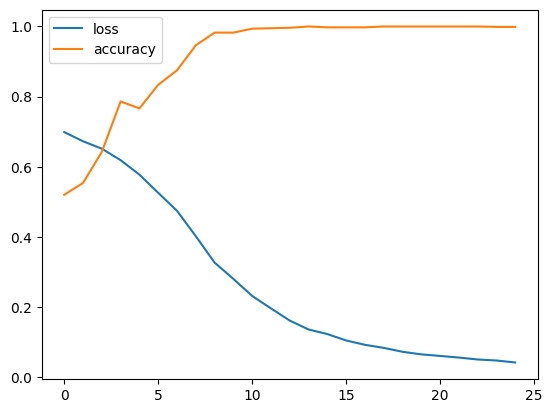

In [32]:
pd.DataFrame(history_3.history).plot()

In [33]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 1.0000


[0.03787722438573837, 1.0]

In [34]:
y_pred_3 = model_3.predict(X_test)
y_pred_3[:10], y_test

7/7 [==============================] - 0s 1ms/step


(array([[0.95754117],
        [0.00779161],
        [0.09079515],
        [0.10311817],
        [0.9478329 ],
        [0.965117  ],
        [0.97006685],
        [0.96712005],
        [0.00818923],
        [0.00176659]], dtype=float32),
 array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1]))

7/7 [==============================] - 0s 2ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

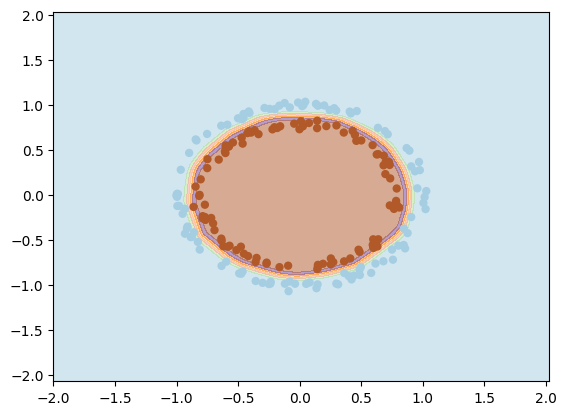

In [35]:
plot_decision_boundary(X_test, y_test, model_3)

In [36]:
acc_3 = get_metrics(y_test, y_pred_3)
acc_3

1.0

# Comparing Results



In [37]:
results =[
    [ "model_1" , acc_1],
    [ "model_2" , acc_2],
    [ "model_3" , acc_3],
 ]
pd.DataFrame(results,columns=[ "Model" , "Accuracy"])

,Model,Accuracy
0,model_1,0.5
1,model_2,0.5
2,model_3,1.0


# Find best learning rate

* Using Learning rate **callbacks** to stop the training

1. Define the model
2. Compile the model
3. Define Learning rate scheduler
4. Fit the model

## Experiment - 4

In [53]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(
    layers = [
                tf.keras.Input(shape=(2,)),
                tf.keras.layers.Dense(units=100, activation="relu"),
                tf.keras.layers.Dense(units=1,activation="sigmoid")
            ],
                        name="2D_point_classifier",
)
model_4.summary()

Model: "2D_point_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"],
                )

In [55]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule= lambda epoch: 1e-4 * 10**(epoch/20),
                                         verbose=1
                                         )

In [ ]:
history = model_4.fit(X_train,y_train,epochs=50,
            callbacks=[learning_rate_scheduler])

<Axes: >

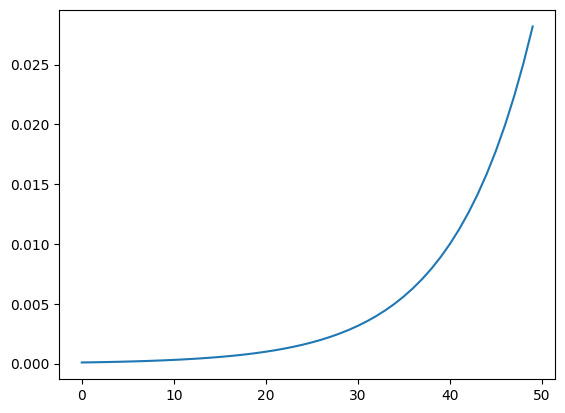

In [57]:
pd.DataFrame(history.history)["lr"].plot()

<Axes: >

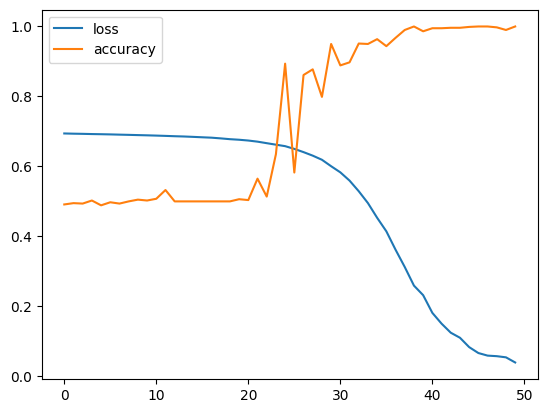

In [58]:
pd.DataFrame(history.history)[["loss","accuracy"]].plot()

<Axes: >

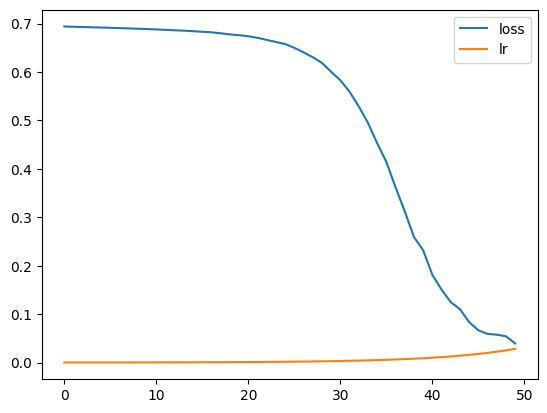

In [59]:
pd.DataFrame(history.history)[["loss","lr"]].plot()

From the above plot, at learning rate 0.01 till 0.02.
We already have a model with lr 0.01 , now I am building another model with 0.02 learning rate.

## Experiment - 5

In [80]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    layers=[
            tf.keras.Input(shape=(2,)),
            tf.keras.layers.Dense(units=100, activation="relu"),
            tf.keras.layers.Dense(units=1, activation="sigmoid")
    ]
)
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               300       
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

In [82]:
history = model_5.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5337
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6463
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.7525
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7750
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8825
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.9500
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.9650
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9850
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9975
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9925
Epoch 11/25
25/25 [

<Axes: >

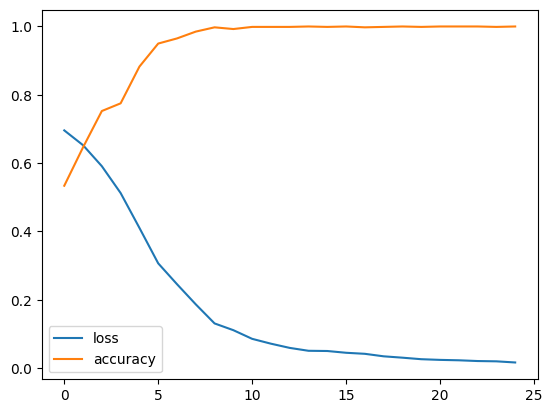

In [83]:
pd.DataFrame(history.history).plot()

In [88]:
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000


[0.015075352974236012, 1.0]

7/7 [==============================] - 0s 2ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

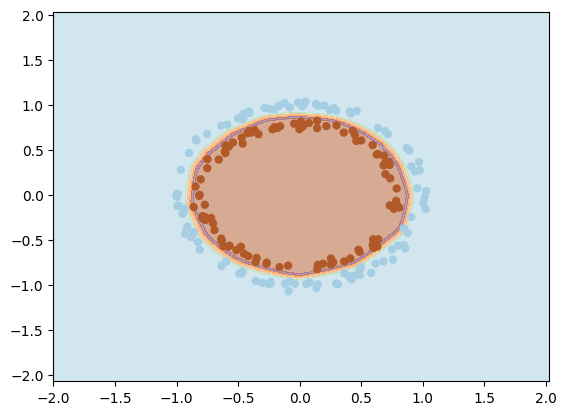

In [90]:
plot_decision_boundary(X=X_test, y=y_test, model=model_5)

## Experiment - 6

In [84]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
    layers=[
            tf.keras.Input(shape=(2,)),
            tf.keras.layers.Dense(units=100, activation="relu"),
            tf.keras.layers.Dense(units=1, activation="sigmoid")
    ]
)
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               300       
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

In [ ]:
history = model_6.fit(X_train, y_train, epochs=25)

<Axes: >

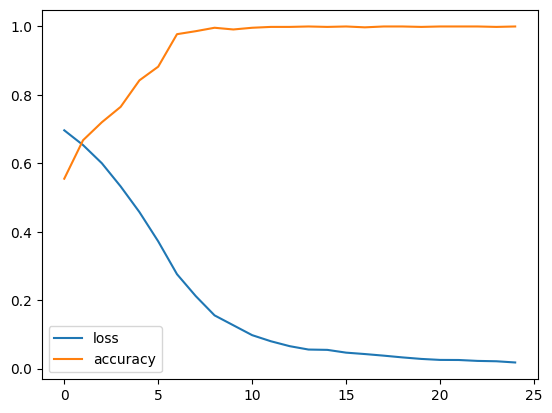

In [87]:
pd.DataFrame(history.history).plot()

In [89]:
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000


[0.01591879315674305, 1.0]

7/7 [==============================] - 0s 2ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

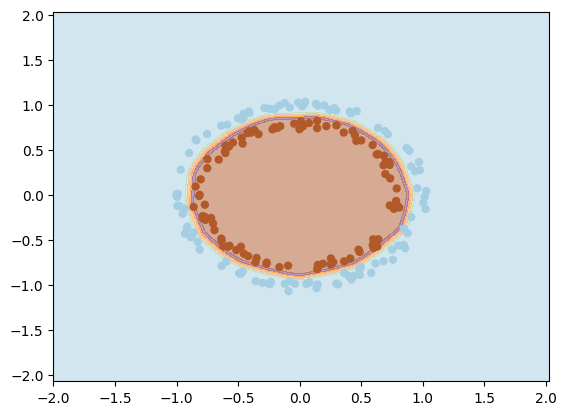

In [91]:
plot_decision_boundary(X=X_test, y=y_test, model=model_6)

# More Evaluation methods

1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion matrix
6. Classification report ( Scikit learn )

In [107]:
loss_6, acc_6 = model_2.evaluate(X_test,y_test)
loss_6, acc_6

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


(0.6932637095451355, 0.5)

In [108]:
y_6_pred = model_2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [109]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_6_pred))

array([[  0, 100],
       [  0, 100]])

In [110]:
precision_score(y_true=y_test,
                 y_pred=tf.round(y_6_pred))

0.5

In [111]:
recall_score(y_true=y_test,
                 y_pred=tf.round(y_6_pred))

1.0

In [112]:
f1_score(y_true=y_test,
                 y_pred=tf.round(y_6_pred))

0.6666666666666666

In [121]:
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[39 61]
 [39 61]]


{'accuracy': 0.5,
 'precission': 0.5,
 'recall': 0.61,
 'F1-Score': 0.5495495495495496}

In [122]:
y_pred = model_2.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[  0 100]
 [  0 100]]


{'accuracy': 0.5,
 'precission': 0.5,
 'recall': 1.0,
 'F1-Score': 0.6666666666666666}

In [123]:
y_pred = model_3.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[100   0]
 [  0 100]]


{'accuracy': 1.0, 'precission': 1.0, 'recall': 1.0, 'F1-Score': 1.0}

In [124]:
y_pred = model_4.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[100   0]
 [  0 100]]


{'accuracy': 1.0, 'precission': 1.0, 'recall': 1.0, 'F1-Score': 1.0}

In [125]:
y_pred = model_5.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[100   0]
 [  0 100]]


{'accuracy': 1.0, 'precission': 1.0, 'recall': 1.0, 'F1-Score': 1.0}

In [126]:
y_pred = model_6.predict(X_test)
print(confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_pred)))
get_metrics(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step
[[100   0]
 [  0 100]]


{'accuracy': 1.0, 'precission': 1.0, 'recall': 1.0, 'F1-Score': 1.0}